In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

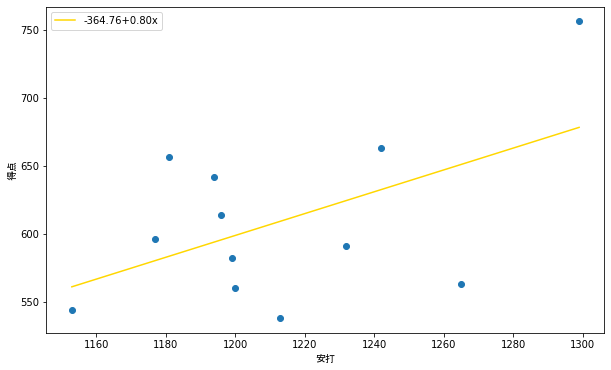

In [4]:
# 2019年データのみ

# 安打と得点

url = 'https://baseball-data.com/19/team/hitter.html'
df = pd.read_html(url)
dfc = df[0]
dfp = df[1]
dfx = dfc.append(dfp)

x = np.array(dfx['安打'])
y = np.array(dfx['得点'])

poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('安打', fontname='MS Gothic')
ax.set_ylabel('得点', fontname='MS Gothic')
ax.plot(xs, ys, color='gold', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [ ]:
dfx.dtypes

In [5]:
# 2009 - 2019 11年分

# 打撃成績

# 空のデータフレームを用意
url = "https://baseball-data.com/19/team/hitter.html"
df = pd.read_html(url)
dfc = df[0]
dfp = df[1]
dfx = dfc.append(dfp)
col = dfx.columns.values
dfo = pd.DataFrame(columns=col)

for i in range(9, 20):
    year = str(i).zfill(2)
    o_url = "https://baseball-data.com/" + year + "/team/hitter.html"
    df = pd.read_html(o_url)
    c = df[0]
    p = df[1]
    dfo = dfo.append(c)
    dfo = dfo.append(p)
dfo

,順位,チーム,試合,勝利,敗北,引分,打率,得点,安打,本塁打,...,三振,併殺打,出塁率,長打率,OPS,NOI,IsoD,IsoP,得点平均,安打平均
0,1,巨人,144,89,46,9,0.275,650,1375,182,...,1043,71,0.329,0.437,0.766,0.475,0.053,0.162,4.51,9.55
1,2,中日,144,81,62,1,0.258,605,1243,136,...,968,112,0.324,0.395,0.719,0.456,0.066,0.136,4.20,8.63
2,3,ヤクルト,144,71,72,1,0.259,548,1238,116,...,925,99,0.320,0.382,0.702,0.447,0.060,0.122,3.81,8.60
3,4,阪神,144,67,73,4,0.255,548,1233,106,...,903,107,0.317,0.376,0.693,0.442,0.061,0.121,3.81,8.56
4,5,広島,144,65,75,4,0.245,528,1163,101,...,931,82,0.307,0.364,0.671,0.428,0.062,0.119,3.67,8.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,ソフトバンク,143,76,62,5,0.251,582,1199,183,...,1084,85,0.312,0.410,0.723,0.449,0.061,0.159,4.07,8.38
2,3,楽天,143,71,68,4,0.251,614,1196,141,...,1127,114,0.333,0.390,0.723,0.463,0.082,0.139,4.29,8.36
3,4,ロッテ,143,69,70,4,0.249,642,1194,158,...,1013,99,0.330,0.402,0.732,0.464,0.081,0.152,4.49,8.35
4,5,日本ハム,143,65,73,5,0.251,560,1200,93,...,1044,106,0.325,0.365,0.690,0.447,0.074,0.114,3.92,8.39


In [6]:
dfo.dtypes

順位       object
チーム      object
試合       object
勝利       object
敗北       object
引分       object
打率      float64
得点       object
安打       object
本塁打      object
盗塁       object
犠打       object
四球       object
死球       object
三振       object
併殺打      object
出塁率     float64
長打率     float64
OPS     float64
NOI     float64
IsoD    float64
IsoP    float64
得点平均    float64
安打平均    float64
dtype: object

In [25]:
lr = lm.LinearRegression()

X = dfo[["OPS"]].values
Y = dfo["勝利"].values

lr.fit(X, Y)

# 説明変数の係数を出力
print('coefficient = ', lr.coef_[0])

# 切片を出力
print('intercept = ', lr.intercept_)

coefficient =  146.83068387143877
intercept =  -33.329824545393706


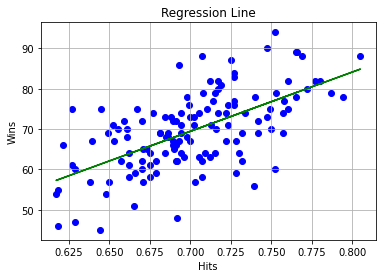

In [26]:
plt.scatter(X, Y, color="blue")
plt.plot(X, lr.predict(X), color="green")

plt.title("Regression Line")
plt.xlabel("Hits")
plt.ylabel("Wins")
plt.grid()

plt.show()

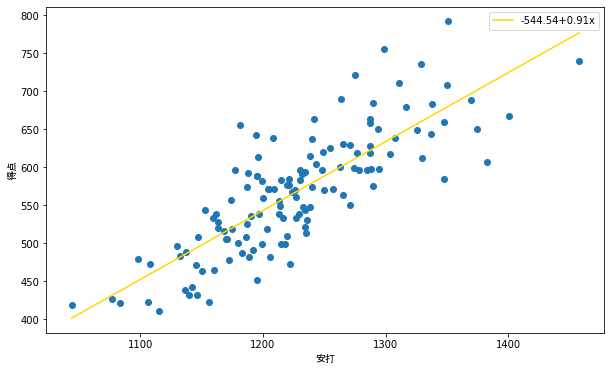

In [18]:
# 安打と勝利
dfo = dfo.astype({"安打": "int64", "得点": "int64"})

x = np.array(dfo['安打'])
y = np.array(dfo['得点'])

poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('安打', fontname='MS Gothic')
ax.set_ylabel('得点', fontname='MS Gothic')
ax.plot(xs, ys, color='gold', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [ ]:
# 投手成績

# 空のデータフレームを用意
url = 'https://baseball-data.com/19/team/pitcher.html'
df = pd.read_html(url)
dfc = df[0]
dfp = df[1]
dfx = dfc.append(dfp)
col = dfx.columns.values
dfd = pd.DataFrame(columns=col)

for i in range(9, 20):
    year = str(i).zfill(2)
    d_url = 'https://baseball-data.com/' + year + '/team/pitcher.html'
    df = pd.read_html(d_url)
    c = df[0]
    p = df[1]
    dfd = dfd.append(c)
    dfd = dfd.append(p)
dfd

In [ ]:
dfd.dtypes